Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
# Creating a train dataset

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
# Creating a validation dataset

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# Creating test dataset

test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [9]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data


In [10]:
# Store one image of each class in images_display

images_display={}

for images, labels in val_ds:
   for i in range(len(labels)):
       class_name = class_names[labels[i]]
      #  print(labels[i])
      #  print(class_name)
       if class_name not in images_display:
           images_display[class_name] = images[i]
           break


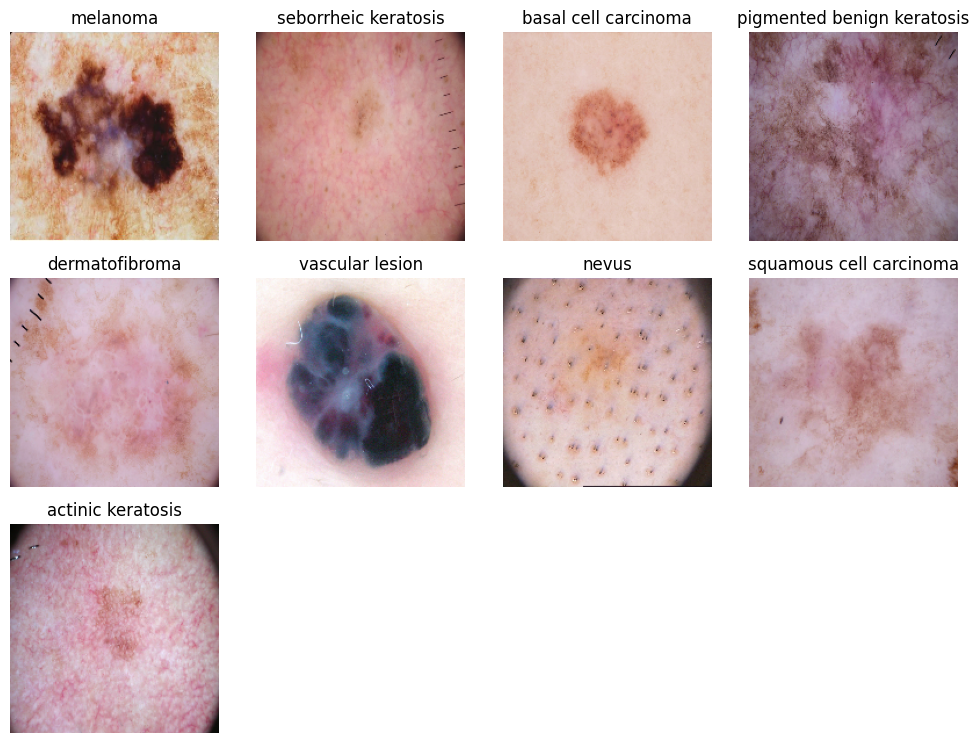

In [11]:
# Visualize the stored images

plt.figure(figsize=(10, 10))
for i, (class_name, image) in enumerate(images_display.items()):
   plt.subplot(4, 4, i + 1)
   plt.imshow(image.numpy().astype("uint8"))
   plt.title(class_name)
   plt.axis('off')
plt.tight_layout()
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
### Creating a classification model with 9 classes with 3 Conv Layers and Dense layers

num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes,activation ="softmax")
])

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [14]:

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

### Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 125s 1s/step - loss: 1.9512 - accuracy: 0.2578 - val_loss: 1.7360 - val_accuracy: 0.4139
Epoch 2/20
56/56 [==============================] - 69s 1s/step - loss: 1.6865 - accuracy: 0.3873 - val_loss: 1.6576 - val_accuracy: 0.3960
Epoch 3/20
56/56 [==============================] - 72s 1s/step - loss: 1.5053 - accuracy: 0.4710 - val_loss: 1.4981 - val_accuracy: 0.4877
Epoch 4/20
56/56 [==============================] - 70s 1s/step - loss: 1.4544 - accuracy: 0.4838 - val_loss: 1.4239 - val_accuracy: 0.5302
Epoch 5/20
56/56 [==============================] - 80s 1s/step - loss: 1.3713 - accuracy: 0.5212 - val_loss: 1.4060 - val_accuracy: 0.5168
Epoch 6/20
56/56 [==============================] - 71s 1s/step - loss: 1.3064 - accuracy: 0.5357 - val_loss: 1.5474 - val_accuracy: 0.4698
Epoch 7/20
56/56 [==============================] - 72s 1s/step - loss: 1.2213 - accuracy: 0.5564 - val_loss: 1.4291 - val_accuracy: 0.5168
Epoch 8/20
56/56 [=

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        9

### Visualizing training results

In [18]:
def show_history(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

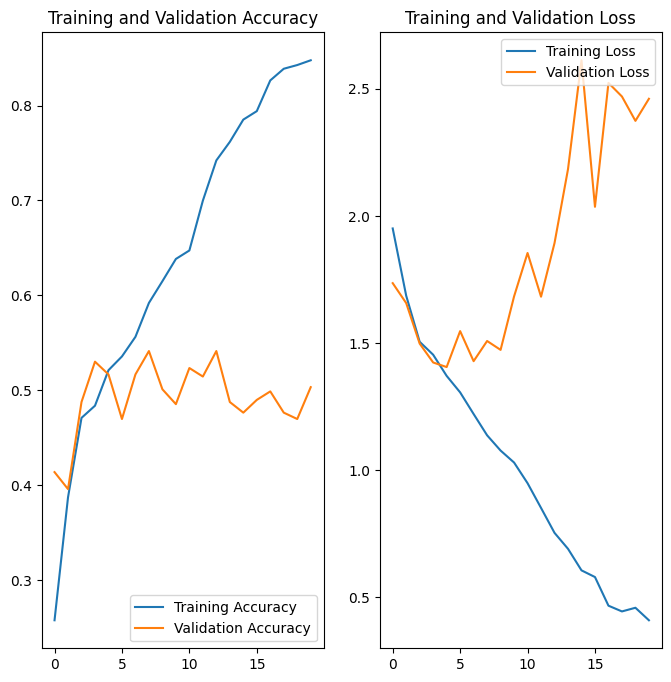

In [19]:
show_history(history)

- **Here we can see that till 5 epochs both training and validation accuracy increases and loss decreases and after that the training loss continues to decrease but validation loss continues to increase.So clearly the model starts to overfit.**
- **So we will try augmenting the data,to reduce overfitting.**

In [59]:
# Testing the model accuracy
model.evaluate(test_ds)

4/4 [==============================] - 23s 445ms/step - loss: 6.1146 - accuracy: 0.2712


[6.114565372467041, 0.2711864411830902]

### Data Augmentation

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create a datagenerator with image augmentation

datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1./255,
        # shear_range=0.2,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2
        )

In [21]:
# create train and valid generator

train_generator = datagen.flow_from_directory(
        data_dir_train,  # this is the target directory
        target_size=(img_height, img_width),  # all images will be resized to 180x180
        batch_size=batch_size,
        class_mode='categorical',
        subset = "training")

val_generator = datagen.flow_from_directory(
        data_dir_train,  # this is the target directory
        target_size=(img_height, img_width),  # all images will be resized to 180x180
        batch_size=batch_size,
        class_mode='categorical',
        subset = "validation")

Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


In [60]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(data_dir_test, target_size=(img_height, img_width),  batch_size=batch_size, class_mode='categorical',)

Found 118 images belonging to 9 classes.


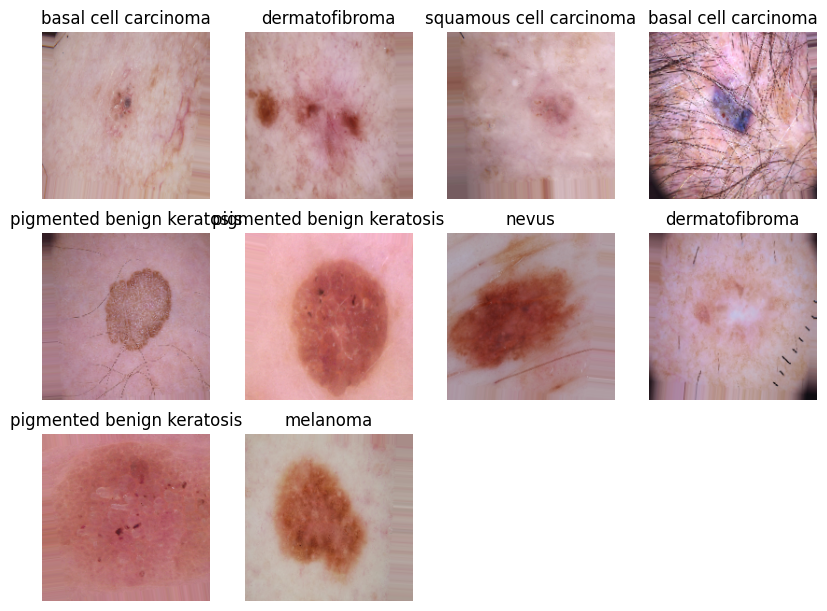

In [22]:
# Get a batch of images and labels (assuming labels are available)
images, labels = next(train_generator)

# Display first few images (adjust number of images to display)
num_images_to_display = 10
plt.figure(figsize=(10, 10))
for i in range(num_images_to_display):
  plt.subplot(4, 4, i + 1)
  plt.imshow(images[i])
  plt.title(f"{class_names[np.argmax(labels[i])]}")  # Display label if available
  plt.axis("off")
plt.show()

In [23]:
# creating a model and using augmented data

num_classes = 9

model_aug = tf.keras.Sequential([
  # tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes,activation="softmax")
])

In [24]:
from keras.optimizers import SGD
opt = SGD(learning_rate=0.01)
model_aug.compile(loss = "categorical_crossentropy", optimizer = opt,metrics=['accuracy'])

In [25]:
epochs = 20
aug_history = model_aug.fit(
  train_generator,
  validation_data=val_generator,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 114s 2s/step - loss: 2.0435 - accuracy: 0.1989 - val_loss: 2.0195 - val_accuracy: 0.1824
Epoch 2/20
57/57 [==============================] - 125s 2s/step - loss: 2.0164 - accuracy: 0.2061 - val_loss: 1.9869 - val_accuracy: 0.2590
Epoch 3/20
57/57 [==============================] - 112s 2s/step - loss: 1.9900 - accuracy: 0.2362 - val_loss: 2.0778 - val_accuracy: 0.2072
Epoch 4/20
57/57 [==============================] - 117s 2s/step - loss: 1.9727 - accuracy: 0.2825 - val_loss: 1.9342 - val_accuracy: 0.2230
Epoch 5/20
57/57 [==============================] - 118s 2s/step - loss: 1.9411 - accuracy: 0.2841 - val_loss: 1.9349 - val_accuracy: 0.2883
Epoch 6/20
57/57 [==============================] - 119s 2s/step - loss: 1.8988 - accuracy: 0.3086 - val_loss: 1.8561 - val_accuracy: 0.2973
Epoch 7/20
57/57 [==============================] - 120s 2s/step - loss: 1.8656 - accuracy: 0.3248 - val_loss: 1.9399 - val_accuracy: 0.2410
Epoch 8/20
57

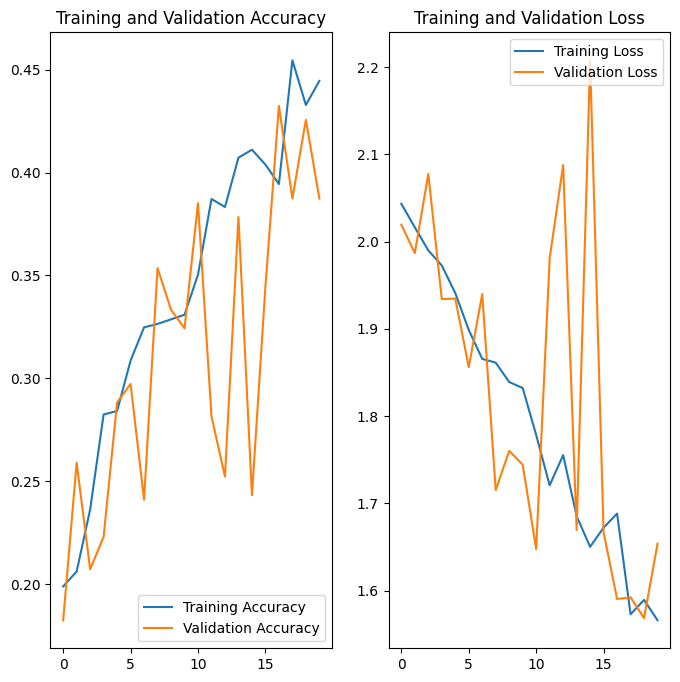

In [26]:
show_history(aug_history)

- **After augmenting we can see that the model's overall accuracy has reduced..but there is no sign of overfitting,now we can tune the augmentation to have increased accuracy.**

In [61]:
model_aug.evaluate(test_generator)

4/4 [==============================] - 9s 2s/step - loss: 2.0315 - accuracy: 0.3220


[2.0315208435058594, 0.32203391194343567]

## Class Distribution of Data

In [27]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [28]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/Skin cancer ISIC The In...,actinic keratosis
1,/content/drive/MyDrive/Skin cancer ISIC The In...,actinic keratosis
2,/content/drive/MyDrive/Skin cancer ISIC The In...,actinic keratosis
3,/content/drive/MyDrive/Skin cancer ISIC The In...,actinic keratosis
4,/content/drive/MyDrive/Skin cancer ISIC The In...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/Skin cancer ISIC The In...,vascular lesion
2235,/content/drive/MyDrive/Skin cancer ISIC The In...,vascular lesion
2236,/content/drive/MyDrive/Skin cancer ISIC The In...,vascular lesion
2237,/content/drive/MyDrive/Skin cancer ISIC The In...,vascular lesion


In [29]:
label_counts = original_df["Label"].value_counts()

In [30]:
label_counts

Label
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

- **Here we can observe that the data is massively imbalanced.**
- **Pigmented Benign Keratosis is the class with most number of samples.(462)**
- **Seborrheic Keratosis is the class with least number of samples.(77)**

## Handling Class Imbalance


In [42]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [45]:
# create new augmented data for minority classes,so each class will have 500 samples

path_to_training_dataset="/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train//"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500-label_counts[i]) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train//actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FCC847F30D0>: 100%|██████████| 386/386 [00:16<00:00, 23.04 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train//basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCC84722C50>: 100%|██████████| 124/124 [00:05<00:00, 21.21 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train//dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCC82771FC0>: 100%|██████████| 405/405 [00:18<00:00, 21.55 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train//melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=679x566 at 0x7FCC84CA0A90>: 100%|██████████| 62/62 [00:12<00:00,  4.86 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train//nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7FCC82714490>: 100%|██████████| 143/143 [00:29<00:00,  4.90 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train//pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCC84CA0910>: 100%|██████████| 38/38 [00:02<00:00, 18.81 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train//seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FCCE053FDC0>: 100%|██████████| 423/423 [00:41<00:00, 10.21 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train//squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCC82771930>: 100%|██████████| 319/319 [00:14<00:00, 22.32 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train//vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCC84CA0910>: 100%|██████████| 361/361 [00:18<00:00, 19.54 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [31]:
data_dir_train = pathlib.Path("/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Aug_Train")


In [32]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

2261


### Lets see the distribution of augmented data after adding new images to the original training data.

In [33]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list[0:5]

['/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025780.jpg',
 '/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026171.jpg',
 '/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026650.jpg',
 '/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026625.jpg',
 '/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026626.jpg']

In [34]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[0:5]

['melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma']

In [35]:
# adding path and label in a dictionary

dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [39]:
# convert into dataframe and append with original dataframe

df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat([original_df,df2])

In [40]:
# checking new count

new_df['Label'].value_counts()

Label
actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: count, dtype: int64

So, 500 images in  all the classes .So class imbalance is handled here.

Train the model on the data created using Augmentor

In [41]:
batch_size = 32
img_height = 180
img_width = 180

Create a training dataset

In [44]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


 Create a validation dataset

In [46]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ="validation" ,## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


 Create your model (make sure to include normalization)

In [55]:
### Creating a classification model with 9 classes with 3 Conv Layers and Dense layers

num_classes = 9

model_imbalance = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes,activation ="softmax")
])

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [56]:

model_imbalance.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

### Train the model

In [57]:
epochs = 30
history_imbalance = model_imbalance.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
113/113 [==============================] - 180s 2s/step - loss: 2.0001 - accuracy: 0.2225 - val_loss: 1.5642 - val_accuracy: 0.3822
Epoch 2/30
113/113 [==============================] - 178s 2s/step - loss: 1.5549 - accuracy: 0.4175 - val_loss: 1.4301 - val_accuracy: 0.4578
Epoch 3/30
113/113 [==============================] - 168s 1s/step - loss: 1.3649 - accuracy: 0.4858 - val_loss: 1.3373 - val_accuracy: 0.4889
Epoch 4/30
113/113 [==============================] - 198s 2s/step - loss: 1.2022 - accuracy: 0.5603 - val_loss: 1.2890 - val_accuracy: 0.5189
Epoch 5/30
113/113 [==============================] - 171s 1s/step - loss: 1.0869 - accuracy: 0.6042 - val_loss: 1.2340 - val_accuracy: 0.5411
Epoch 6/30
113/113 [==============================] - 174s 2s/step - loss: 0.9142 - accuracy: 0.6675 - val_loss: 1.1060 - val_accuracy: 0.6256
Epoch 7/30
113/113 [==============================] - 175s 2s/step - loss: 0.8621 - accuracy: 0.6861 - val_loss: 1.1992 - val_accuracy: 0.5989

 Visualize the model results

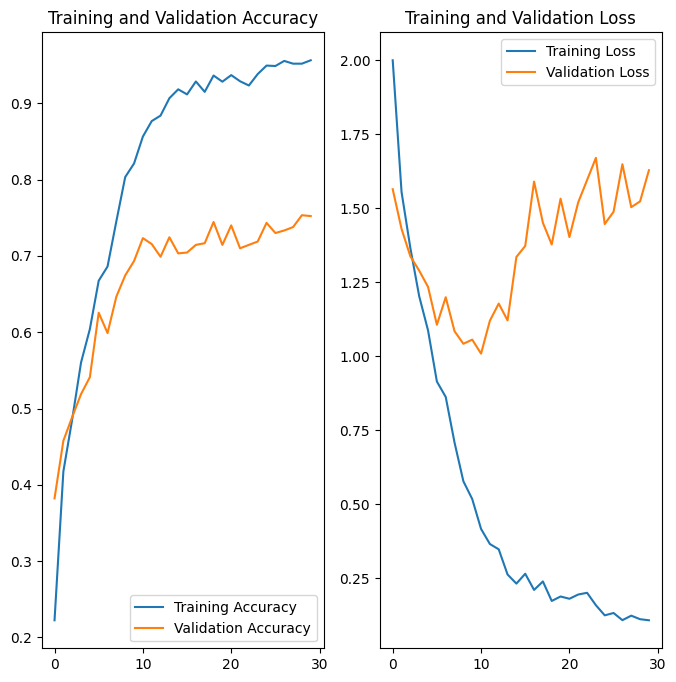

In [58]:
show_history(history_imbalance)

**The model after class rebalancing has achieved a greater accuracy.But due to training for large number of epochs..model seems to memorize the patterns little bit ,slightly overfitting.if we stop at 5-10 epochs,We would have a better model.**

In [63]:
# Testing the model accuracy
model_imbalance.evaluate(test_ds)

4/4 [==============================] - 6s 273ms/step - loss: 9.0753 - accuracy: 0.3220


[9.075337409973145, 0.32203391194343567]